<a href="https://colab.research.google.com/github/PrathUpadhyay/NLP/blob/master/Assignment_1_18210058_Prathamesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ans 1 (explanation inline comments)

In [0]:
from google.colab import drive
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re

nltk.download('punkt')

drive.mount("/content/drive")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# read file from google-drive, colab doesnt keeps uploaded files persistently
tweets_csv = pd.read_csv('drive/My Drive/Colab Notebooks/content/tweets-dataset.csv')

word_dict = {}

tokens = 0
types = 0

punctuation_regex = "[A-Za-z0-9]*"

for sentence in tweets_csv.Sentence:
  words = nltk.word_tokenize(sentence)

  for word in words:
    word = word.lower()
    word = (re.match(punctuation_regex, word)).group(0)
    if word =="":
        continue;
    tokens += 1
    if word in word_dict:
      word_dict[word] += 1
    else:
      word_dict[word] = 1

types = len(word_dict)
types_2 = len(word_dict.keys())
ttr = types/tokens

print ("No of tokens: ", tokens)
print ("No of types: ", types, types_2)
print ("TTR: ", ttr)

# import operator
# out = sorted(word_dict.items(), key=operator.itemgetter(1))

# import pprint
# pprint.pprint(out)


No of tokens:  312997
No of types:  36300 36300
TTR:  0.11597555248133369


### Ans 2 (explanation inline comments)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


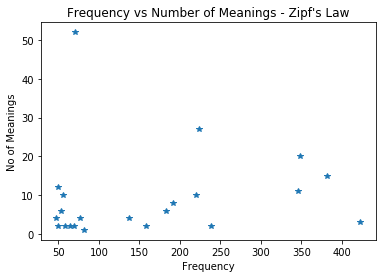

       No of Meanings ∝ √(Frequency of words)


In [0]:
# Zipfs Law for relation between  and frequency

from matplotlib import pyplot
# from nltk.corpus import wordnet
nltk.download('wordnet')


# some random meaningful words taken from dataset and their frequency
word_freq_dict = {
    'tomorrow': 423,
    'time': 382,
    'have': 348,
    'like': 346,
    'atheist': 239,
    'good': 224,
    'love': 220,
    'night': 192,
    'party': 183,
    'twitter': 158,
    'please': 137,
    'photo': 82,
    'morning': 76,
    'play': 70,
    'insane': 69,
    'birthday': 64,
    'police': 58,
    'power': 55,
    'story': 53,
    'help': 50,
    'jail': 49,
    'public': 47
}

word_meaning_count_dict = {}

for word in word_freq_dict:
  word_meaning_count_dict[word] = len(wordnet.synsets(word))

# print(word_meaning_count_dict)
# print()

pyplot.plot(word_freq_dict.values(), word_meaning_count_dict.values(), '*')
pyplot.title("Frequency vs Number of Meanings - Zipf's Law")
pyplot.xlabel('Frequency')
pyplot.ylabel('No of Meanings')
pyplot.show()
print('       No of Meanings ∝ √(Frequency of words)')

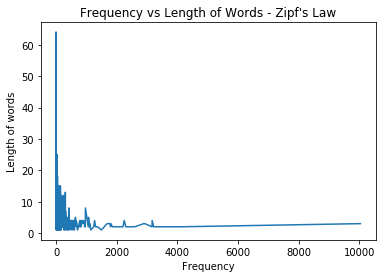

Length of word ∝ 1/Frequency


In [0]:
# Zipfs Law for relation between length and frequency

zipf_len_words = []
zipf_freq_words = []

import operator
for key, val in reversed(sorted(word_dict.items(), key = operator.itemgetter(1))):
    zipf_len_words.append(len(key))
    zipf_freq_words.append(val)

pyplot.plot(zipf_freq_words, zipf_len_words)
pyplot.title("Frequency vs Length of Words - Zipf's Law")
pyplot.xlabel('Frequency')
pyplot.ylabel('Length of words')
pyplot.show()
print('Length of word ∝ 1/Frequency')

### Ans 3 (explanation inline comments)

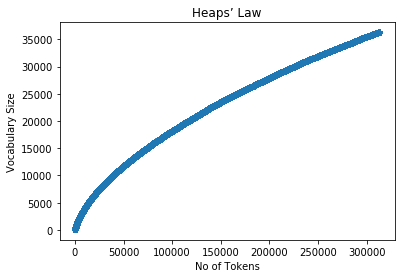

k = intercept of graph, beta = slope of graph
Value of beta: 0.661946605508796    value of k: 8.703950713714683


In [0]:
import numpy as np

token_per_segment_list = []
word_per_segment_list = []

token_per_segment_count = 0
word_per_segment_dict = {}

# Here we pick each sentence one-by-one and record word & tokens in that
# Finally this data will be used for displaying Heap's Law

for section in tweets_csv.Sentence:
  words = nltk.word_tokenize(section)

  for word in words:
    word = word.lower()
    word = (re.match(punctuation_regex, word)).group(0)
    if word =="":
        continue;
    token_per_segment_count += 1
    if word in word_per_segment_dict:
      word_per_segment_dict[word] += 1
    else:
      word_per_segment_dict[word] = 1

    # Now keep record of this section's cumulative token count and vocabulray size  
    token_per_segment_list.append(token_per_segment_count)
    word_per_segment_list.append(len(word_per_segment_dict))    


pyplot.plot(token_per_segment_list, word_per_segment_list,'*')
pyplot.xlabel('No of Tokens')
pyplot.ylabel('Vocabulary Size')
pyplot.title("Heaps’ Law")
pyplot.show()

print("k = intercept of graph, beta = slope of graph")

slope, intercept = np.polyfit(np.log(token_per_segment_list), np.log(word_per_segment_list), 1)

print("Value of beta:", slope,"   value of k:", np.exp(intercept))
